In [5]:
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting

In [6]:
# We will use a simple particle world!
x_init = np.zeros((2, 1)) # Initial position (0,0)
x_goal = np.array([[2., 2.]]).T # Goal position (2, 2)

# Let's create a tree (I will use a dictionary)
tree = {}
tree[(x_init[0, 0], x_init[1, 0])] = []

# Let's make a helper for that
def state_to_tuple(xx):
    x = xx.reshape((-1, 1))
    return (x[0, 0], x[1, 0])

# And for the inverse
def tuple_to_state(t):
    return np.array([[t[0], t[1]]]).T

In [7]:
# Now we need to create a sampler!
def sample_state():
    return np.random.rand(2, 1) * 10. - 5. # Random states in [-5., 5.]

# Now we need to find the nearest node
def nearest(x, tree):
    dist = np.inf
    near = None
    # Simplest checking! Scales badly in nodes O(n)
    for t in tree:
        s = tuple_to_state(t)
        d = np.linalg.norm(s - x)
        if d < dist:
            dist = d
            near = s
    return near

# Finally we need to connect two states
def connect(x_start, x_target):
    # Here we can check for collision free paths, max moving distance, and in general we should apply a local planner
    max_dist = 0.2
    return (x_target - x_start) / np.linalg.norm(x_target - x_start) * max_dist + x_start

def valid_state(x):
    # We do not allow states outside [-5., 5.]
    if (np.abs(x) > 5.).any():
        return False
    return True

In [8]:
# Now let's make the RRT algorithm
def RRT(x_start, x_goal, max_iters = 1000):
    # Let's create a tree (I will use a dictionary)
    tree = {}
    tree[state_to_tuple(x_start)] = []
    for i in range(max_iters):
        x_sample = sample_state()
        x_nearest = nearest(x_sample, tree)
        if x_nearest is None: # Something bad happened
            continue
        x_new = connect(x_nearest, x_sample)
        # we assume the path is always valid here, but check for the final state
        if not valid_state(x_new):
            continue
        tree[state_to_tuple(x_nearest)].append(x_new)
        # Add the new node as well
        tree[state_to_tuple(x_new)] = []
        if np.linalg.norm(x_goal - x_new) < 0.1:
            return True, tree
    return False, tree

In [9]:
# Let's try it out
valid, tree = RRT(x_init, x_goal, 2000)

print(valid, len(tree))

True 829


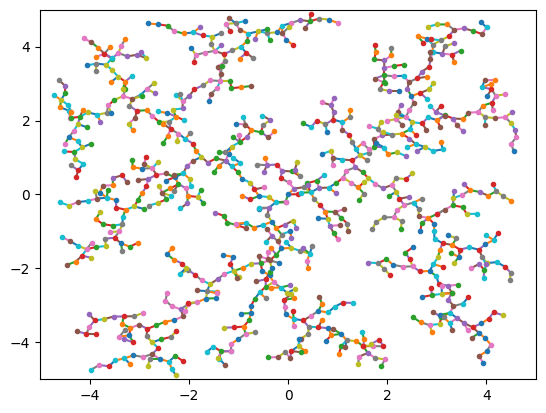

In [10]:
# Let's visualize the tree
fig = plt.figure()
ax = fig.add_subplot(111)

for s in tree:
    ax.plot(s[0], s[1], '.', zorder=2)

    for c in tree[s]:
        ax.plot([s[0], c[0, 0]], [s[1], c[1, 0]], zorder=1)

plt.ylim(-5., 5.);
plt.xlim(-5., 5.);